In [1]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import sys
import os
sys.path.insert(1, os.path.join("..","."))

In [2]:
lats = np.random.uniform(-90,90,size = 1500)
lngs = np.random.uniform(-180,180,size = 1500)
lat_lngs = zip(lats,lngs)
lat_lngs
coordinates = list(lat_lngs)

In [3]:
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

61.24145408967479 71.11893874139025
54.30057286971467 -95.6927750357569
16.399225354240386 -20.588684817333387
67.61198627752131 -107.28699840558295
10.703240630084096 -38.81532132847411
62.29449547787701 -152.69046618089746
-85.16295005943087 93.08666692804252
-8.070568185056828 -57.06717481330051
-4.992307277446159 -145.70477250732577
-27.705371527508483 128.41919040104568
56.06952062534029 -39.81770869189725
13.621708306421766 41.923623325562744
-26.040631137205587 21.16016406803317
-55.79044405377773 -96.55279834748076
-58.63340385223192 -83.5393476952625
26.49480686178343 -136.7402195405636
-47.55087525912585 118.28299310653591
-68.75525499351245 -155.92014537889116
48.7363029008587 -44.958926962405684
44.04848772996371 176.93447625180374
4.387993210758836 49.38702933742792
-26.527728778034906 178.47556338344202
15.28948718913665 107.48311920273778
80.6487498843752 153.16057743154374
24.083654015738745 164.22167765144246
47.13381533314961 55.33632198035454
31.70207474799203 -142.1

-52.563622349490046 7.607958318155653
-78.82231847878106 -18.506147553990388
9.11606929941803 132.79492625287315
-59.4290959127364 -177.1447564681752
-4.597023827238516 -2.2772455777411835
-11.106109909288207 179.91074765871252
-33.12480760761474 -106.44804893985398
-87.91122117691854 -26.06560979806258
31.681899795680593 0.6083877909105695
28.180571362057066 -87.82421635180673
-44.87769612441359 -142.23036084149877
-4.705012731557801 47.26744126318897
39.506606469655196 71.64497263348028
-11.165328699603222 120.29211408368172
-27.023927185386583 22.31824077301414
59.280018462977864 3.992512187378736
18.107627356978767 145.01825749796728
55.857342075854774 113.85711883372551
52.99651677029743 -84.91912106389839
-57.659877090840055 0.9596466078582182
-71.17930842869814 10.055410825789238
-74.1913811263988 9.540350834282464
25.33784369500404 15.20856601320213
88.77552999766542 -2.482661972551199
75.10945618985022 86.06471026229127
-74.61114470948147 -78.82104140286611
-73.7922889821492 6

49.461304774410905 -41.013419922677144
-60.796530654978625 130.69514732476603
-65.71576056626421 177.10733030081582
29.767301096076892 -21.146389367834246
23.660236655356215 165.50688221110028
-70.4091496203392 -61.030417225013835
-81.97075730221609 153.48415120986562
48.644430637756926 -154.97779024904054
-62.9216657090801 10.159204526477112
-28.98444611489382 -28.920623315324804
1.4972997403525312 70.01168744821413
9.915813667892508 134.73682364276056
-33.41040911504307 16.380931175275805
-45.70525018392326 -18.87707692658239
-87.04732126419157 89.6736830506182


In [4]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)        

628

In [ ]:
import requests
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [6]:
import time
from datetime import datetime


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval   ")
print("---------------------------")
# Create counters.
record_count = 1
set_count = 1
for i,city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if(i%50==0 and i>=50):
        set_count+=1
        record_count = 1
        time.sleep(10)
        
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record{record_count} of Set{set_count} | {city}")
    # Add 1 to the record count.
    record_count+=1
# Run an API request for each of the cities.
    try:
    # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({
            "City":city.title(),
            "Lat":city_lat,
            "Lng": city_lng,                 
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date                 
        })
    except:
        print("City not found.Skipping....")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    


    
                                          
                                          

Beginning Data Retrieval   
---------------------------
Processing Record1 of Set1 | salym
Processing Record2 of Set1 | thompson
Processing Record3 of Set1 | santa maria
Processing Record4 of Set1 | yellowknife
Processing Record5 of Set1 | acarau
Processing Record6 of Set1 | kenai
Processing Record7 of Set1 | albany
Processing Record8 of Set1 | jacareacanga
Processing Record9 of Set1 | atuona
Processing Record10 of Set1 | yulara
Processing Record11 of Set1 | nanortalik
Processing Record12 of Set1 | edd
Processing Record13 of Set1 | bokspits
City not found.Skipping....
Processing Record14 of Set1 | punta arenas
Processing Record15 of Set1 | pacific grove
Processing Record16 of Set1 | mataura
Processing Record17 of Set1 | torbay
Processing Record18 of Set1 | nikolskoye
Processing Record19 of Set1 | hobyo
Processing Record20 of Set1 | russell
Processing Record21 of Set1 | kon tum
Processing Record22 of Set1 | chokurdakh
Processing Record23 of Set1 | butaritari
Processing Record24 of Set1 

Processing Record46 of Set4 | san vicente
Processing Record47 of Set4 | roebourne
Processing Record48 of Set4 | hambantota
Processing Record49 of Set4 | bubaque
Processing Record50 of Set4 | barcelos
Processing Record1 of Set5 | salalah
Processing Record2 of Set5 | kavieng
Processing Record3 of Set5 | amderma
City not found.Skipping....
Processing Record4 of Set5 | kiama
Processing Record5 of Set5 | mianyang
Processing Record6 of Set5 | auki
Processing Record7 of Set5 | tacoronte
Processing Record8 of Set5 | koboldo
City not found.Skipping....
Processing Record9 of Set5 | ornskoldsvik
Processing Record10 of Set5 | cabo san lucas
Processing Record11 of Set5 | puerto madryn
Processing Record12 of Set5 | angra
City not found.Skipping....
Processing Record13 of Set5 | tokur
Processing Record14 of Set5 | sentyabrskiy
City not found.Skipping....
Processing Record15 of Set5 | quatre cocos
Processing Record16 of Set5 | mount isa
Processing Record17 of Set5 | ambodifototra
City not found.Skippi

Processing Record39 of Set8 | monteagudo
Processing Record40 of Set8 | piacabucu
Processing Record41 of Set8 | singkang
Processing Record42 of Set8 | kapoeta
Processing Record43 of Set8 | chara
Processing Record44 of Set8 | bakchar
Processing Record45 of Set8 | izumo
Processing Record46 of Set8 | grindavik
Processing Record47 of Set8 | guelengdeng
City not found.Skipping....
Processing Record48 of Set8 | san quintin
Processing Record49 of Set8 | husavik
Processing Record50 of Set8 | qaqortoq
Processing Record1 of Set9 | tondano
Processing Record2 of Set9 | chimbote
Processing Record3 of Set9 | trzcianka
Processing Record4 of Set9 | saint-raymond
Processing Record5 of Set9 | ovre ardal
Processing Record6 of Set9 | deputatskiy
Processing Record7 of Set9 | amahai
Processing Record8 of Set9 | datong
Processing Record9 of Set9 | key largo
Processing Record10 of Set9 | verkhnevilyuysk
Processing Record11 of Set9 | tiksi
Processing Record12 of Set9 | aykhal
Processing Record13 of Set9 | khata

Processing Record37 of Set12 | chelyabinsk-70
City not found.Skipping....
Processing Record38 of Set12 | wuwei
Processing Record39 of Set12 | altamira
Processing Record40 of Set12 | mehamn
Processing Record41 of Set12 | librazhd
Processing Record42 of Set12 | tura
Processing Record43 of Set12 | mrirt
City not found.Skipping....
Processing Record44 of Set12 | pointe-noire
Processing Record45 of Set12 | bentiu
Processing Record46 of Set12 | gongzhuling
Processing Record47 of Set12 | susehri
Processing Record48 of Set12 | ust-kuyga
Processing Record49 of Set12 | kamaishi
Processing Record50 of Set12 | sorland
Processing Record1 of Set13 | mareeba
Processing Record2 of Set13 | mocuba
Processing Record3 of Set13 | krasnoselkup
Processing Record4 of Set13 | mirabad
Processing Record5 of Set13 | shelburne
Processing Record6 of Set13 | chumikan
Processing Record7 of Set13 | chagoda
Processing Record8 of Set13 | pahrump
Processing Record9 of Set13 | shiyan
Processing Record10 of Set13 | san joa

In [8]:
len(city_data)

568

In [9]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Salym,60.0625,71.4789,32.29,99,100,5.53,RU,2022-05-07 20:28:06
1,Thompson,55.7435,-97.8558,69.96,43,75,10.36,CA,2022-05-07 20:28:06
2,Santa Maria,-29.6842,-53.8069,67.30,60,0,5.75,BR,2022-05-07 20:28:07
3,Yellowknife,62.4560,-114.3525,37.92,93,100,28.77,CA,2022-05-07 20:28:07
4,Acarau,-2.8856,-40.1200,80.58,84,80,8.88,BR,2022-05-07 20:28:08
5,Kenai,60.5544,-151.2583,57.02,56,0,10.36,US,2022-05-07 20:25:04
6,Albany,42.6001,-73.9662,59.43,34,100,1.01,US,2022-05-07 20:26:40
7,Jacareacanga,-6.2222,-57.7528,81.64,83,100,1.59,BR,2022-05-07 20:28:08
8,Atuona,-9.8000,-139.0333,78.40,73,19,16.20,PF,2022-05-07 20:28:09
9,Yulara,-25.2406,130.9889,42.64,61,0,5.75,AU,2022-05-07 20:28:09


In [10]:
new_col_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed']
city_data_df = city_data_df[new_col_order]


In [11]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Salym,RU,2022-05-07 20:28:06,60.0625,71.4789,32.29,99,100,5.53
1,Thompson,CA,2022-05-07 20:28:06,55.7435,-97.8558,69.96,43,75,10.36
2,Santa Maria,BR,2022-05-07 20:28:07,-29.6842,-53.8069,67.30,60,0,5.75
3,Yellowknife,CA,2022-05-07 20:28:07,62.4560,-114.3525,37.92,93,100,28.77
4,Acarau,BR,2022-05-07 20:28:08,-2.8856,-40.1200,80.58,84,80,8.88
5,Kenai,US,2022-05-07 20:25:04,60.5544,-151.2583,57.02,56,0,10.36
6,Albany,US,2022-05-07 20:26:40,42.6001,-73.9662,59.43,34,100,1.01
7,Jacareacanga,BR,2022-05-07 20:28:08,-6.2222,-57.7528,81.64,83,100,1.59
8,Atuona,PF,2022-05-07 20:28:09,-9.8000,-139.0333,78.40,73,19,16.20
9,Yulara,AU,2022-05-07 20:28:09,-25.2406,130.9889,42.64,61,0,5.75


In [13]:
output_data_file = "../weather_data/cities.csv"
city_data_df.to_csv(output_data_file,index_label = "City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

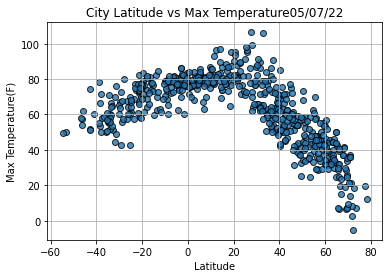

In [16]:
import time
plt.scatter(lats,max_temps,edgecolor = "black",linewidths = 1,marker="o",alpha = 0.8,label = "Cities")
plt.title(f"City Latitude vs Max Temperature"+ time.strftime('%x'))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../weather_data/Fig1.png")
plt.show()


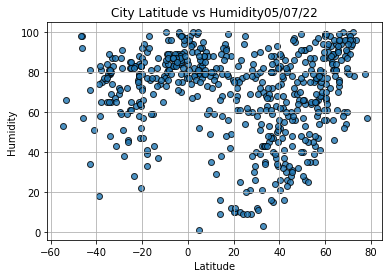

In [17]:
import time
plt.scatter(lats,humidity,edgecolor = "black",linewidths = 1,marker="o",alpha = 0.8,label = "Cities")
plt.title(f"City Latitude vs Humidity"+ time.strftime('%x'))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../weather_data/Fig2.png")
plt.show()

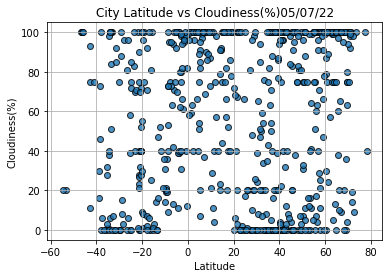

In [19]:
import time
plt.scatter(lats,cloudiness,edgecolor = "black",linewidths = 1,marker="o",alpha = 0.8,label = "Cities")
plt.title(f"City Latitude vs Cloudiness(%)"+ time.strftime('%x'))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../weather_data/Fig3.png")
plt.show()

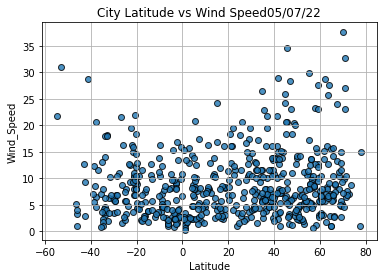

In [20]:
import time
plt.scatter(lats,wind_speed,edgecolor = "black",linewidths = 1,marker="o",alpha = 0.8,label = "Cities")
plt.title(f"City Latitude vs Wind Speed"+ time.strftime('%x'))
plt.ylabel("Wind_Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../weather_data/Fig4.png")
plt.show()

In [21]:

from scipy.stats import linregress


In [22]:

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-value is:{r_value:.3f}")
    plt.show()
    



In [23]:
index13 = city_data_df.loc[13]
index13

City                Pacific Grove
Country                        US
Date          2022-05-07 20:26:54
Lat                       36.6177
Lng                     -121.9166
Max Temp                    72.55
Humidity                       72
Cloudiness                     40
Wind Speed                  16.11
Name: 13, dtype: object

In [24]:
city_data_df.loc[(city_data_df['Lat']>=0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Salym,RU,2022-05-07 20:28:06,60.0625,71.4789,32.29,99,100,5.53
1,Thompson,CA,2022-05-07 20:28:06,55.7435,-97.8558,69.96,43,75,10.36
3,Yellowknife,CA,2022-05-07 20:28:07,62.4560,-114.3525,37.92,93,100,28.77
5,Kenai,US,2022-05-07 20:25:04,60.5544,-151.2583,57.02,56,0,10.36
6,Albany,US,2022-05-07 20:26:40,42.6001,-73.9662,59.43,34,100,1.01


In [25]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [26]:
southern_hemi_df 

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Santa Maria,BR,2022-05-07 20:28:07,-29.6842,-53.8069,67.30,60,0,5.75
4,Acarau,BR,2022-05-07 20:28:08,-2.8856,-40.1200,80.58,84,80,8.88
7,Jacareacanga,BR,2022-05-07 20:28:08,-6.2222,-57.7528,81.64,83,100,1.59
8,Atuona,PF,2022-05-07 20:28:09,-9.8000,-139.0333,78.40,73,19,16.20
9,Yulara,AU,2022-05-07 20:28:09,-25.2406,130.9889,42.64,61,0,5.75
...,...,...,...,...,...,...,...,...,...
541,Mocuba,MZ,2022-05-07 20:34:06,-16.8392,36.9856,65.79,98,6,2.48
551,Pitimbu,BR,2022-05-07 20:34:11,-7.4706,-34.8086,75.79,79,95,8.48
552,Mtinko,TZ,2022-05-07 20:34:12,-4.5500,34.8500,62.65,71,11,9.62
558,Charters Towers,AU,2022-05-07 20:34:15,-20.1000,146.2667,68.58,92,100,10.38


The r-value is:-0.841


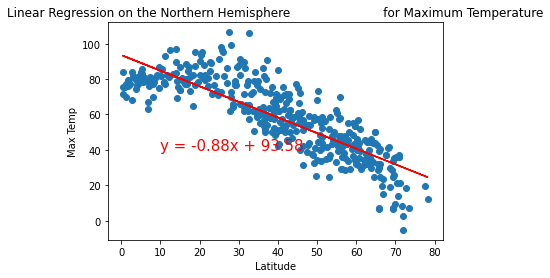

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
                        for Maximum Temperature', 'Max Temp',(10,40))

The r-value is:0.694


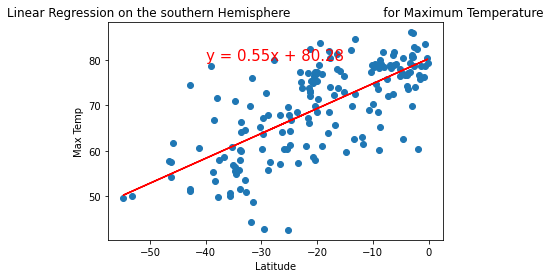

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the southern Hemisphere\
                        for Maximum Temperature', 'Max Temp',(-40,80))

The r-value is:0.098


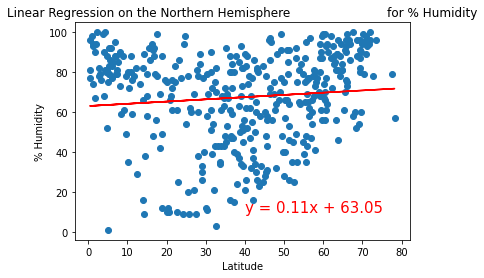

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

The r-value is:0.348


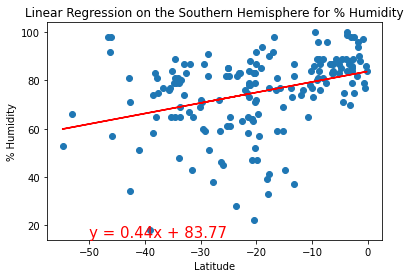

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

The r-value is:-0.014


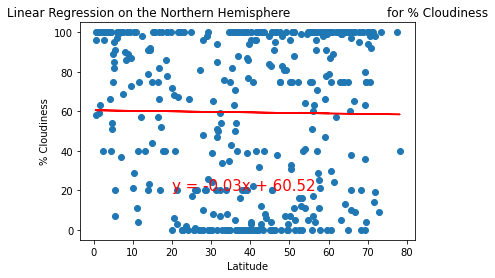

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(20,20))

The r-value is:0.149


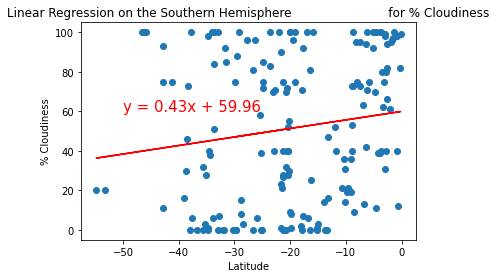

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

The r-value is:0.147


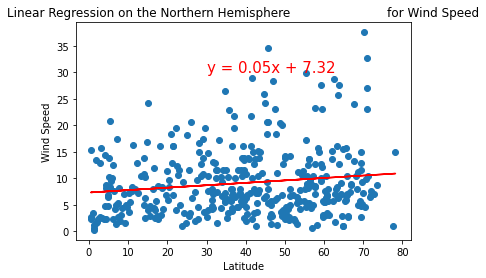

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(30,30))

The r-value is:-0.215


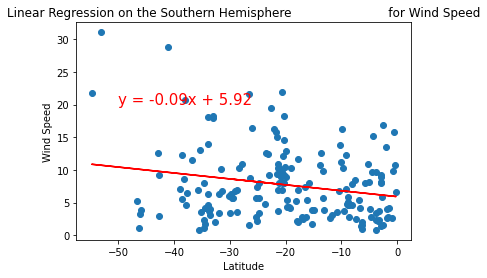

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))
